In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data = pd.read_csv("data/weight-height.csv")

data["height_cm"] = data["Height"]*2.54
data["weight_kg"] = data["Weight"]*0.453592
data = data.drop(["Height", "Weight"], 1)
data["factor"] = data.weight_kg / data.height_cm
data["Gender"] = data["Gender"].apply(lambda x: int(x == "Male"))

In [3]:
data.head()


,Gender,height_cm,weight_kg,factor
0,1,187.571423,109.720985,0.584956
1,1,174.706036,73.622732,0.421409
2,1,188.239668,96.497550,0.512631
3,1,182.196685,99.809504,0.547812
4,1,177.499761,93.598619,0.527317


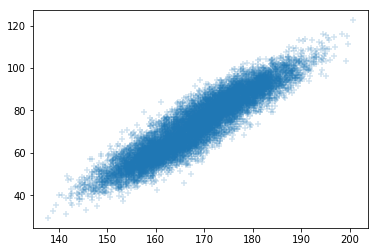

In [5]:
plt.scatter(data.height_cm, data.weight_kg, marker="+", alpha=0.2)

$$MSE= \frac{1}{N} \sum_{i=1}^{N} (y_i-y^*_i)^2 = \frac{1}{N} \sum_{i=1}^{N} (k*x_i+b-y^*_i)^2$$

$$y_i = k*x_i+b$$

$$MSE= \frac{1}{N} \sum_{i=1}^{N} (y_i-y^*_i)^2 = \frac{1}{N} \sum_{i=1}^{N} (k_1*x_{i1} + k_2*x_{i2} +b-y^*_i)^2$$

$$\nabla_k MSE = \frac{1}{N} \sum_{i=1}^{N} x_i*2*(k*x_i+b-y_i^*)$$
$$\nabla_b MSE = \frac{1}{N} \sum_{i=1}^{N} 2*(k*x_i+b-y_i^*)$$

$$(k_i, b_i) = (k_{i-1}, b_{i-1}) - \alpha * \left( \nabla_k MSE(k_{i-1}, b_{i-1}), \nabla_b MSE(k_{i-1}, b_{i-1}) \right)$$

In [9]:
a = np.array([[1,2,3],[4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [5]:
np.zeros((5,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [8]:
np.ones_like(a)

array([[1, 1, 1],
       [1, 1, 1]])

In [10]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [13]:
np.random.rand(3,4)

array([[0.18117049, 0.00681948, 0.93032938, 0.31641277],
       [0.98677623, 0.99297534, 0.02919842, 0.76814552],
       [0.86932531, 0.69272567, 0.54194141, 0.32852296]])

In [15]:
np.random.randn(1,3) # N(0,1)

array([[-0.42886795,  0.23068787, -0.86603165]])

In [33]:
b = np.random.normal(5, 3, 100000)

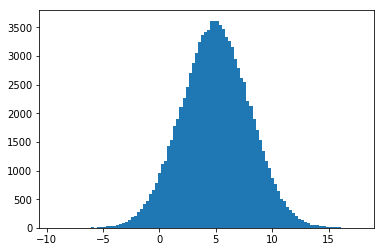

In [34]:
plt.hist(b, bins=100);

In [36]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [37]:
b = np.ones_like(a)
b

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [38]:
b+a

array([[ 2,  3,  4],
       [ 5,  6,  7],
       [ 8,  9, 10]])

In [41]:
a/b

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [42]:
a.dot(b)

array([[ 6,  6,  6],
       [15, 15, 15],
       [24, 24, 24]])

In [43]:
np.dot(a,b)

array([[ 6,  6,  6],
       [15, 15, 15],
       [24, 24, 24]])

In [44]:
a @ b

array([[ 6,  6,  6],
       [15, 15, 15],
       [24, 24, 24]])

In [45]:
b @ a

array([[12, 15, 18],
       [12, 15, 18],
       [12, 15, 18]])

In [48]:
a.dtype

dtype('int32')

Типы данных в numpy:

**Целые числа:**
* int32
* int8
* int16
* int64
* uint32
* uint8
* uint16
* uint64

Floating point:
* float16
* float32
* float64


In [49]:
a.astype(np.float32)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)

In [67]:
X = data[["Gender", "height_cm"]].values
y = data["weight_kg"].values

In [68]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=data.Gender)

In [106]:
X_val

array([[  1.        , 178.63087568],
       [  0.        , 168.8540107 ],
       [  0.        , 147.27304153],
       ...,
       [  1.        , 186.78313602],
       [  1.        , 179.64220799],
       [  0.        , 162.40753085]])

In [130]:
def MSE(X, y, k, b):
    tmp = (k @ X.T) + b - y
    return (1/X.shape[0] * (tmp @ tmp.T))[0,0]

def dMSE_k(X, y, k, b):
    tmp = (k @ X.T) + b - y
    return (2/X.shape[0] * (tmp @ X))

def dMSE_b(X, y, k, b):
    tmp = (k @ X.T) + b - y
    return (2/X.shape[0] * np.sum(tmp))


In [131]:
k = np.random.randn(1,2)
b = np.random.randn()

In [132]:
losses = []

alpha = 1e-6

for i in range(1000):
    losses.append(MSE(X_train, y_train, k, b))
    
    kn = k - alpha * dMSE_k(X_train, y_train, k, b)
    bn = b - alpha * dMSE_b(X_train, y_train, k, b)
    
    k, b = kn, bn

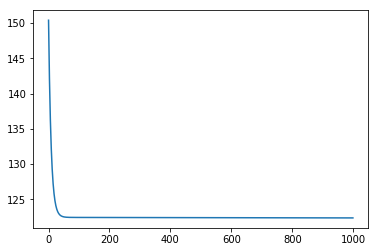

In [133]:
plt.plot(losses)

In [134]:
MSE(X_train, y_train, k, b)

122.37790168830648

In [135]:
MSE(X_val, y_val, k, b)

121.94256093807971